# RDKit Interface

In this tutorial we will demonstrate how `molli` `Molecule` objects can be efficiently converted into RDKit objects. Let's discuss some of their functionality.

Note: `rdkit` and `openbabel` are necessary dependencies for this interface that are not natively installed within `molli`, but these can be added through conda using the lines:
`conda install rdkit` and `conda install openbabel` respectively

In [1]:
#Imports molli
import molli as ml

#Configures molli visualizer
ml.visual.configure(bg_color='white')

#Imports rdkit
from rdkit import Chem

#Imports the rdkit interface in molli
from molli.external import rdkit as mrd

#Imports numpy
import numpy as np

## Object creation

Existing `Molecule` objects can be utilized to create an RDKit molecule using the `to_rdmol` function. Since there is different behavior upon creation of RDKit molecules based on the format utilzied when reading structures, multiple native RDKit readers were made available, including `MOL2`, `PDB`, `SDF`, and `SMI`. This implementation detects problems upon parsing and will raise erros if they occur upon creation of the RDKit molecule.

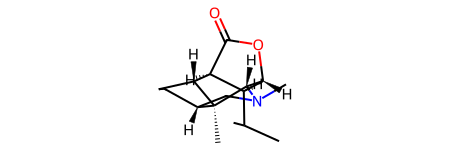

In [2]:
# This creates a molecule object
ml_mol = ml.load(ml.files.dendrobine_mol2)

# This creates an RDKit molecule object using the SDF reader so
rd_mol = mrd.to_rdmol(ml_mol, via='sdf', remove_hs=True, raise_kekulize=True)

rd_mol

In the above example, all hydrogens were removed from the `rd_mol`, DESPITE THE IMAGE DEPICTING IT WITH HYDROGENS. The element labels are not a 1:1 mapping between `ml_mol` and `rd_mol`. This can be shown by printing the symbols of the atoms in both objects.

If the `ml_mol` is reduced to only heavy atoms, it maintains the same order as the `rd_mol`.

In [3]:
#This retrieves the rdkit atom symbols
rd_labels = [x.GetSymbol() for x in rd_mol.GetAtoms()]

#This retrieves the molli atom labels
ml_labels = [x.label for x in ml_mol.atoms]

#This retrieves all non-hydrogen atom labels based on the current order of the list
ml_heavy_labels = [ml_mol.get_atom(x).label for x in ml_mol.heavy.parent_atom_indices]

print(f'All Molli Element Labels:\n{ml_labels}')
print(f'All RDKit Element Labels:\n{rd_labels}')
print(f'Molli Heavy Element Labels Only:\n{ml_heavy_labels}')

All Molli Element Labels:
['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'O', 'C', 'C', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
All RDKit Element Labels:
['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'O', 'C', 'C', 'C', 'C', 'C']
Molli Heavy Element Labels Only:
['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'O', 'C', 'C', 'C', 'C', 'C']


Hydrogens can also be maintained for the purpose of mapping the indices of atoms from the RDKit molecule object `rd_mol` back to the full 3D structure in the `ml_mol`. 

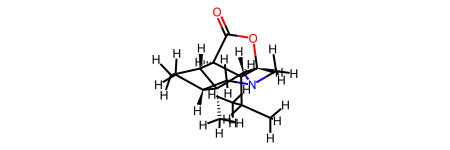

In [4]:
# This creates a molecule object
ml_mol = ml.load(ml.files.dendrobine_mol2)

# This creates an RDKit molecule object using the SDF reader so
rd_mol = mrd.to_rdmol(ml_mol, via='sdf', remove_hs=False, raise_kekulize=True)

rd_mol

In this example, since the Hydrogens were not removed, the order of element labels has not been changed between the `ml_mol` and `rd_mol` It is recommended that you work with `rd_mol` without removing the hydrogens to allow for direct mapping.

In [5]:
rd_atoms = [x.GetSymbol() for x in rd_mol.GetAtoms()]
ml_elements = [x.label for x in ml_mol.atoms]
print(f'All Molli Element Labels:\n{ml_elements}')
print(f'All RDKit Element Labels:\n{rd_atoms}')

All Molli Element Labels:
['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'O', 'C', 'C', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
All RDKit Element Labels:
['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'O', 'C', 'C', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


## Canonicalization of 2D and 3D objects

A common method utilized within RDKit is "canonicalization" of SMILES strings, which reorders the order of atoms in the SMILES string such that any permutation of a SMILES input will always be represented in the same way.

This allows direct comparison of structures solely by strings, which is a much less intensive operation than comparing individual atom and bond properties between molecule objects.

In [6]:
#Bromobenzene 1
smi1 = 'c1ccccc1(Br)'
rdmol1 = Chem.MolFromSmiles(smi1)
can_smi1 = Chem.MolToSmiles(rdmol1, canonical=True)

#Bromobenzene 2
smi2 = 'c1ccc(Br)cc1'
rdmol2 = Chem.MolFromSmiles(smi2)
can_smi2 = Chem.MolToSmiles(rdmol2, canonical=True)

print(f'SMILES 1\nOriginal SMILES:{smi1}\nCanonical SMILES:{can_smi1}\n')
print(f'SMILES 2\nOriginal SMILES:{smi2}\nCanonical SMILES:{can_smi2}')

SMILES 1
Original SMILES:c1ccccc1(Br)
Canonical SMILES:Brc1ccccc1

SMILES 2
Original SMILES:c1ccc(Br)cc1
Canonical SMILES:Brc1ccccc1


Molli has an implementation that can take the `rd_mol` and `ml_mol` and map the two structures to a canonicalized version of the `rd_mol` 

This will not change the actual coordinates of the `ml_mol` but rather just the order of the coordinates. This will allow for integration into RDKit workflows without accidental loss of information.

Note: The current implementation will modify the `ml_mol` atom, bond, and coordinate order in place.

In [7]:
can_rdmol, atom_reorder, bond_reorder = mrd.can_mol_order(rd_mol)

can_ml_rd_dict = mrd.reorder_molecule(ml_mol, can_rdmol, atom_reorder, bond_reorder)

new_rd_labels = [x.GetSymbol() for x in can_rdmol.GetAtoms()]
new_ml_labels = [x.label for x in ml_mol.atoms]
print(f'Molli Element Labels:\n{new_rd_labels}')
print(f'RDKit Element Labels:\n{new_ml_labels}')

Molli Element Labels:
['H', 'C', 'H', 'H', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'C', 'O', 'O', 'C', 'H', 'C', 'H', 'C', 'C', 'H', 'H', 'H', 'C', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H']
RDKit Element Labels:
['H', 'C', 'H', 'H', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'C', 'O', 'O', 'C', 'H', 'C', 'H', 'C', 'C', 'H', 'H', 'H', 'C', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H']


## The Atom Filter Class

There is also an implementation of an interface with RDKit's `rdQueries` module that allows for quick querying of atom properties. 

The `atom_filter` class offers quick querying of rdkit mols, returning an array of `True` or `False` based on the position of atoms in an ordered array. 

An example use case is given below:

In [8]:
#(E)-β-Bromostyrene instantiation
rdmol = Chem.MolFromSmiles('Br\C=C\c1ccccc1')

#(E)-β-Bromostyrene instantiation canonicalization using RDKit
rdmol = mrd.canonicalize_rdmol(rdmol, remove_hs=True)

#This creates an atom filter object from the rdkit mol
ac_rdmol = mrd.atom_filter(rdmol)

#This queries the atoms to detect aromatic atoms as defined by RDKit, and creates a boolean array out of them.
aromatic_bool = ac_rdmol.aromatic_type()

print(f'This is the canonicalized SMILES: {Chem.MolToSmiles(rdmol)}')
print(f'This is the boolean array of atoms in the same order marking whether atoms are aromatic or not:\n{aromatic_bool}')


This is the canonicalized SMILES: Br/C=C/c1ccccc1
This is the boolean array of atoms in the same order marking whether atoms are aromatic or not:
[False False False  True  True  True  True  True  True]


Within the SMILES string, the property of atoms being `aromatic` is only `True` for the atoms associated with the benzene ring, so the resulting array will be `False` for the first 3 atoms, while the last 6 atoms in that array will be `True`. This logic can now undergo basic boolean operations to allow for complex querying very easily.

In [9]:
#Identifies atoms that are both sp2 and NOT aromatic
alkene_bool = ac_rdmol.sp2_type() & ~ac_rdmol.aromatic_type()

print(f'This is the canonicalized SMILES: {Chem.MolToSmiles(rdmol)}')
print(f'This is the boolean array of atoms in the same order identifying sp2 atoms that are NOT aromatic:\n{aromatic_bool}')

This is the canonicalized SMILES: Br/C=C/c1ccccc1
This is the boolean array of atoms in the same order identifying sp2 atoms that are NOT aromatic:
[False False False  True  True  True  True  True  True]


### Smarts Querying Example 1: Halogen Detection

This has also been extended to allow Smarts querying and to allow more general purpose binning of atoms. An example is shown below with how 4 different rdkit mol objects could be binned into different lists just by querying molecules that may contain either a `Cl`, `Br`, or `I`.

In [10]:
#(1-chloro-3-[(E)-2-chloroethenyl]benzene instantiation
di_cl_rdmol = Chem.MolFromSmiles('Cl\C=C\c1cccc(Cl)c1')
#(1-chloro-3-[(E)-2-chloroethenyl]benzene canonicalization
di_cl_rdmol = mrd.canonicalize_rdmol(di_cl_rdmol)
#Sets name for RDKit molecule
di_cl_rdmol.SetProp("_Name", '2cl_mol')


#(E)-β-Bromostyrene instantiation
br_rdmol = Chem.MolFromSmiles('Br\C=C\c1ccccc1')
#(E)-β-Bromostyrene canonicalization
br_rdmol = Chem.MolFromSmiles(Chem.MolToSmiles(br_rdmol, canonical=True))
#Sets name for RDKit molecule
br_rdmol.SetProp("_Name", 'br_mol')


#(E)-β-Iodostyrene canonicalization
i_rdmol = Chem.MolFromSmiles('I\C=C\c1ccccc1')
#(E)-β-Iodostyrene canonicalization
i_rdmol = Chem.MolFromSmiles(Chem.MolToSmiles(i_rdmol, canonical=True))
#Sets name for RDKit molecule
i_rdmol.SetProp("_Name", 'i_rdmol')


#(E)-β-Methylstyrene initialization
c_rdmol = Chem.MolFromSmiles('C\C=C\c1ccccc1')
#(E)-β-Methylstyrene canonicalization
c_rdmol = Chem.MolFromSmiles(Chem.MolToSmiles(c_rdmol, canonical=True))
#Sets name for RDKit molecule
c_rdmol.SetProp("_Name", 'c_rdmol')

rdmol_list = [di_cl_rdmol, br_rdmol, i_rdmol, c_rdmol]


In [11]:
#Creates example bins
no_halogen_mols = list()
single_halogen_mols = list()
multi_halogen_mols = list()

#Iterates throught the list containing all 4 RDKit Mols
for rdmol in rdmol_list:

    #Instantiates atom filter object
    ac_rdmol = mrd.atom_filter(rdmol)

    #Defines a boolean looking for the following halogens based off of SMARTS
    halogen_bool = ac_rdmol.smarts_query('[Cl,Br,I]')

    #Counts the True values
    true_count = np.count_nonzero(halogen_bool)

    #Bins names/results based on number of halogens
    if true_count > 1:
        multi_halogen_mols.append(rdmol.GetProp("_Name"))

    elif true_count == 1:
        single_halogen_mols.append(rdmol.GetProp("_Name"))
        
    else:
        no_halogen_mols.append(rdmol.GetProp("_Name"))

print(f'Multiple Halogen Mols:\n{multi_halogen_mols}\n')
print(f'Single Halogen Mols:\n{single_halogen_mols}\n')
print(f'No Halogen Mols\n{no_halogen_mols}\n')

Multiple Halogen Mols:
['2cl_mol']

Single Halogen Mols:
['br_mol', 'i_rdmol']

No Halogen Mols
['c_rdmol']



### Smarts Querying Example 2: Complex Substructure Assignment

This can also be linked to the original 3D `molli` object, enabling flexible substructure querying methods that would be otherwise unavailable without hard-encoded rules of branching on the 3D structure. An example is shown below how SMARTS enable the querying of specific carbon atoms associated with the 2 5-membered rings of the of pyrrolidine and methyl group the 3D object utilizing RDKit's substructure querying.

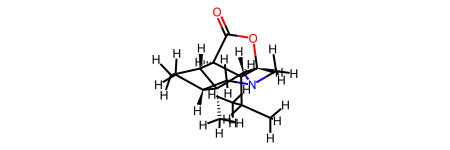

In [12]:
# This creates a molecule object
ml_mol = ml.load(ml.files.dendrobine_mol2)

# This creates an RDKit molecule object using the SDF reader so
rd_mol = mrd.to_rdmol(ml_mol, via='sdf', remove_hs=False, raise_kekulize=True)

rd_mol

In [13]:
#This creates an atom filter instance from the RDKit mol
ac_mol = mrd.atom_filter(rd_mol)

# This finds the two five-membered rings associated with the pyrrolidine, the full methyl group on the pyrrolidine, and avoiding the lactone
substruct_bool = ac_mol.ring_size5() & ~ac_mol.smarts_query("O=C1CCCO1") | ac_mol.smarts_query("CN") 

#This is the 
print(Chem.MolToSmiles(rd_mol, canonical=False))
print(substruct_bool)

N1(C([H])([H])[H])C([H])([H])[C@]2([H])[C@]3(C([H])([H])[H])[C@]1([H])[C@]1([H])OC(=O)[C@]([H])([C@@]3([H])C([H])([H])C2([H])[H])[C@@]1(C(C([H])([H])[H])(C([H])([H])[H])[H])[H]
[ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


This can then be assigned to the original 3D molecule since the atom orders are maintained between `rd_mol` and `ml_mol`.

In [14]:
#This creates an array of atoms of interest
atoms_of_interest = np.array(ml_mol.atoms)[substruct_bool]
print(atoms_of_interest)

#This assigns the attribute "Query" to atoms and bonds that we've considered of interest.
for atom in atoms_of_interest:
    atom: ml.Atom
    #Finds atoms of interest
    atom.attrib["Query"] = True

    #Finds bonds connected to this atom
    bonds = ml_mol.bonds_with_atom(atom)

    #Iterates through bonds to determine which ones are associated with atoms of interest
    for bond in bonds:
        if (bond.a1 in atoms_of_interest) and (bond.a2 in atoms_of_interest):
            bond.attrib["Query"] = True

[Atom(element=N, isotope=None, label='N', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)
 Atom(element=C, isotope=None, label='C', formal_charge=0, formal_spin=0)]


## Visualization of Molecules

`molli` has one last feature in the RDKit interface, which is the ability to visualize either existing `molli` `Molecule` objects or RDKit molecule objects. This can be done with either the `ml_rd_visualize`

### Example 1: Visualization of Query for `Molecule` object

`ml_rd_visualize` creates a new rdkit object for rendering using whatever format reader is available. It can utilize a `Molecule`, `MoleculeLibrary`, or `list` of `Molecule` objects. 

If a subset of `Atom` or `Bond` objects within a `Molecule` have a particular property, and the atom order is maintained upon creation of the RDKit object, it will highlight the atoms with that have this property. An example of how to use `ml_rd_visualize` is below

```python
# This can visualize a molli Molecule using RDKit's Renderer
mrd.ml_rd_visualize(
    file_path='dendrobine.svg', #File Path to write 
    obj=ml_mol, #Object of interest
    via='sdf', #Format for conversion
    remove_hs=False, #Keeps hydrogens
    legend_prop="_Name", #Label to use in the legend
    highlight_atom_prop="Query", #Highlights atoms with this property
    highlight_bond_prop="Query", #Highlights bonds with this property
    )
```

This code gives the following result

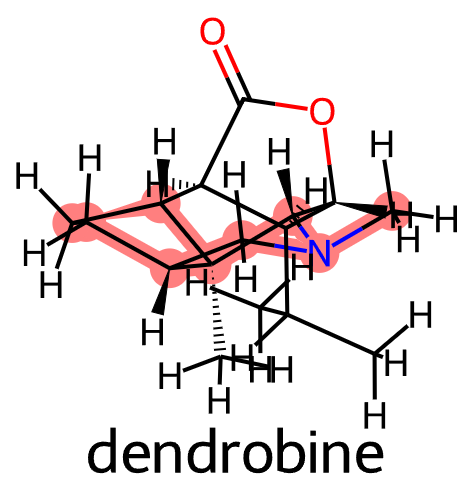

### Example 2: Visualization of Query for RDKit Object

RDKit's visualization tool has also been made available for general rdkit objects as well using the `rd_visualize` function. Here is an example of how to highlight atoms and bonds associated with aromatic rings in two example RDKit objects.

Starting with creation of the objects

In [15]:
#(1-chloro-3-[(E)-2-chloroethenyl]benzene instantiation
di_cl_rdmol = Chem.MolFromSmiles('Cl\C=C\c1cccc(Cl)c1')
#(1-chloro-3-[(E)-2-chloroethenyl]benzene canonicalization
di_cl_rdmol = mrd.canonicalize_rdmol(di_cl_rdmol)
#Sets name for RDKit molecule
di_cl_rdmol.SetProp("_Name", '2cl_mol')


#(E)-β-Bromostyrene instantiation
br_rdmol = Chem.MolFromSmiles('Br\C=C\c1ccccc1')
#(E)-β-Bromostyrene canonicalization
br_rdmol = Chem.MolFromSmiles(Chem.MolToSmiles(br_rdmol, canonical=True))
#Sets name for RDKit molecule
br_rdmol.SetProp("_Name", 'br_mol')

Next is using the `atom_filter` to find aromatic rings in these 2 RDKit objects.

In [16]:
#Places rdkit mols in a list
rdkit_mols = [di_cl_rdmol, br_rdmol]

#Iterates throught the list containing both RDKit mols
for rdmol in rdkit_mols:
    rdmol: Chem.Mol
    #Instantiates atom filter object
    ac_rdmol = mrd.atom_filter(rdmol)

    #Defines a boolean looking for the following halogens based off of SMARTS
    arom_bool = ac_rdmol.aromatic_type()

    #Finds the indices of atoms that are aromatic
    sub_atoms_idx = np.where(arom_bool)[0].tolist()

    #Iterates through atom indices where substructure is aromatic
    for idx in sub_atoms_idx:
        
        #Finds RDKit atoms where values are True and Sets Property: Query
        atom = rdmol.GetAtomWithIdx(idx)
        atom.SetProp("Query", "1")

        #Iterates through bonds and finds bonds where both atoms are in the aromatic substructure
        for bond in rdmol.GetBonds():
            a1 = bond.GetBeginAtomIdx()
            a2 = bond.GetEndAtomIdx()

            if (a1 in sub_atoms_idx) and (a2 in sub_atoms_idx):
                bond.SetProp("Query", "1")

The final code for visualization is shown below

```python
# This visualizes an existing list of RDKit molecules
mrd.rd_visualize(
    file_path='rdkit_mols.svg', #File Path to write 
    rd_list=rdkit_mols, #Object of interest
    legend_prop="_Name", #Label to use in the legend
    highlight_atom_prop="Query", #Highlights atoms with this property
    highlight_bond_prop="Query", #Highlights bonds with this property
    )
```

This code gives the following result

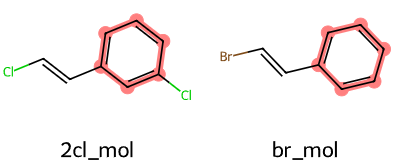